## 모듈 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 추출

In [3]:
irisDF = pd.read_csv('./data/iris.csv')
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
list(irisDF.columns[:-1])

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# ???
cov_mat = np.cov(irisDF[list(irisDF.columns[:-1])], ddof=0)
cov_mat

array([[3.5625  , 3.31625 , 3.265   , ..., 2.18625 , 1.85625 , 1.95    ],
       [3.31625 , 3.111875, 3.04125 , ..., 2.216875, 1.878125, 1.97125 ],
       [3.265   , 3.04125 , 2.9925  , ..., 2.01625 , 1.71125 , 1.7975  ],
       ...,
       [2.18625 , 2.216875, 2.01625 , ..., 3.141875, 2.738125, 2.87625 ],
       [1.85625 , 1.878125, 1.71125 , ..., 2.738125, 2.406875, 2.53125 ],
       [1.95    , 1.97125 , 1.7975  , ..., 2.87625 , 2.53125 , 2.6625  ]])

In [7]:
# ?????
cov_mat = np.cov(irisDF[list(irisDF.columns[:-1])], irisDF[list(irisDF.columns[:-1])], ddof=0)
cov_mat

array([[3.5625  , 3.31625 , 3.265   , ..., 2.18625 , 1.85625 , 1.95    ],
       [3.31625 , 3.111875, 3.04125 , ..., 2.216875, 1.878125, 1.97125 ],
       [3.265   , 3.04125 , 2.9925  , ..., 2.01625 , 1.71125 , 1.7975  ],
       ...,
       [2.18625 , 2.216875, 2.01625 , ..., 3.141875, 2.738125, 2.87625 ],
       [1.85625 , 1.878125, 1.71125 , ..., 2.738125, 2.406875, 2.53125 ],
       [1.95    , 1.97125 , 1.7975  , ..., 2.87625 , 2.53125 , 2.6625  ]])

In [8]:
cov_mat = np.cov(irisDF[irisDF.columns[0]], irisDF[irisDF.columns[1]], ddof=0)
cov_mat

array([[ 0.68112222, -0.03900667],
       [-0.03900667,  0.18675067]])

In [9]:
# 하나씩 하기로 결정
# 공분산을 담을 딕셔너리
cov_dict = {}

# 컬럼별로 각각 공분산 산출
for i in irisDF.columns[:-1]:
    cov_dict[i] = []
    for j in irisDF.columns[:-1]:
        cov_mat = np.cov(irisDF[i], irisDF[j], ddof=0)
        cov_dict[i].append(cov_mat[0][1])
        print(f'{i} : {j}')
        print(cov_mat)

sepal_length : sepal_length
[[0.68112222 0.68112222]
 [0.68112222 0.68112222]]
sepal_length : sepal_width
[[ 0.68112222 -0.03900667]
 [-0.03900667  0.18675067]]
sepal_length : petal_length
[[0.68112222 1.26519111]
 [1.26519111 3.09242489]]
sepal_length : petal_width
[[0.68112222 0.51345778]
 [0.51345778 0.57853156]]
sepal_width : sepal_length
[[ 0.18675067 -0.03900667]
 [-0.03900667  0.68112222]]
sepal_width : sepal_width
[[0.18675067 0.18675067]
 [0.18675067 0.18675067]]
sepal_width : petal_length
[[ 0.18675067 -0.319568  ]
 [-0.319568    3.09242489]]
sepal_width : petal_width
[[ 0.18675067 -0.11719467]
 [-0.11719467  0.57853156]]
petal_length : sepal_length
[[3.09242489 1.26519111]
 [1.26519111 0.68112222]]
petal_length : sepal_width
[[ 3.09242489 -0.319568  ]
 [-0.319568    0.18675067]]
petal_length : petal_length
[[3.09242489 3.09242489]
 [3.09242489 3.09242489]]
petal_length : petal_width
[[3.09242489 1.28774489]
 [1.28774489 0.57853156]]
petal_width : sepal_length
[[0.57853156 0.

In [10]:
# 공분산 딕셔너리 데이터프레임으로 전환
covDF = pd.DataFrame(cov_dict, index=cov_dict.keys())
covDF

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.681122,-0.039007,1.265191,0.513458
sepal_width,-0.039007,0.186751,-0.319568,-0.117195
petal_length,1.265191,-0.319568,3.092425,1.287745
petal_width,0.513458,-0.117195,1.287745,0.578532


In [11]:
# 다해놨는데 데이터프레임 메소드에 이미 있네
irisDF.cov(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [12]:
# 상관계수
irisDF.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


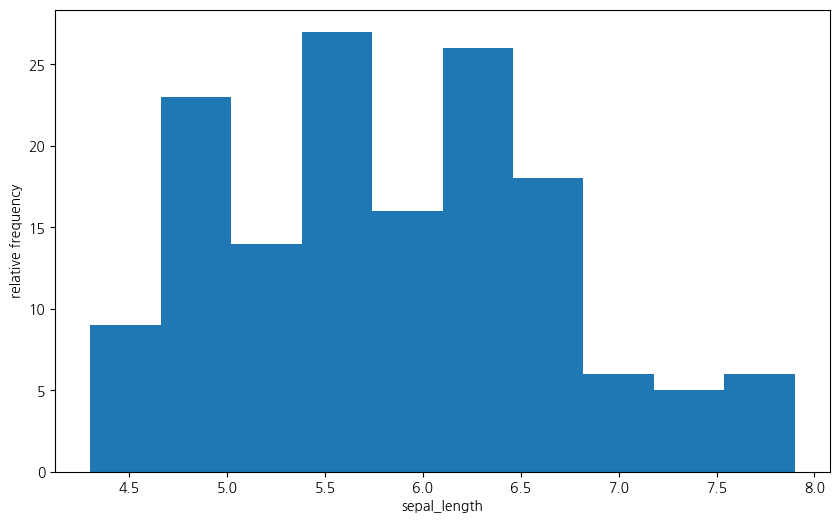

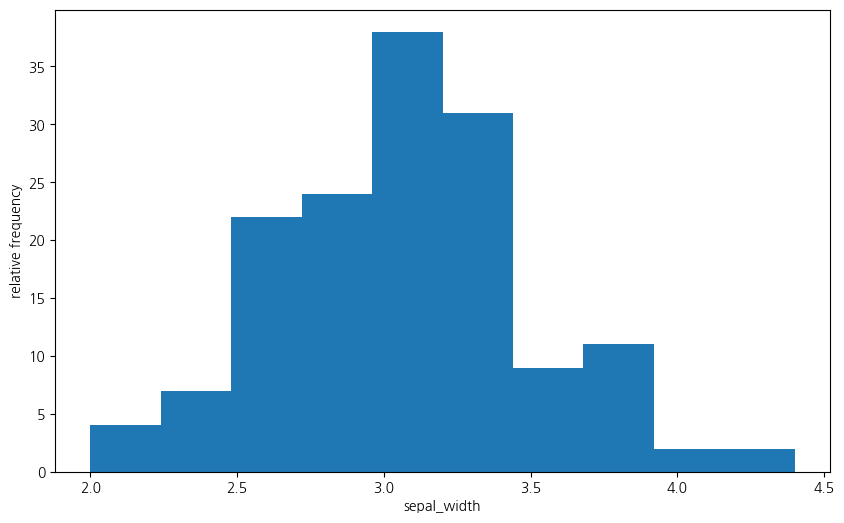

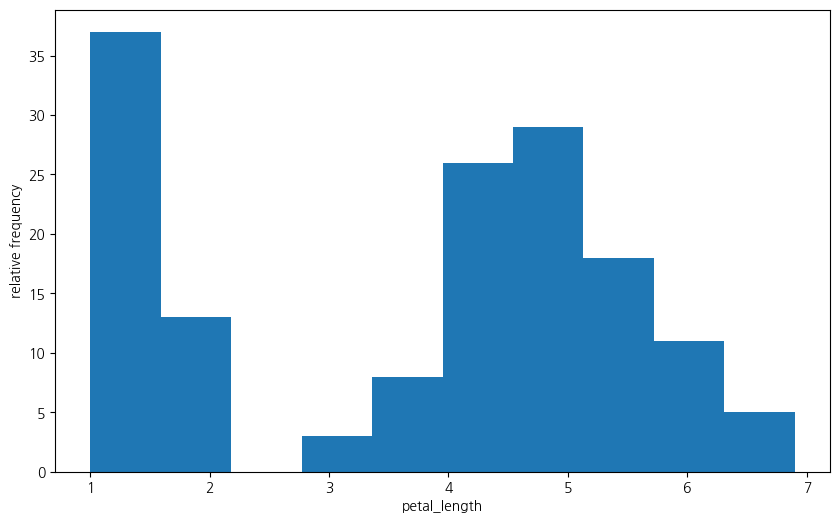

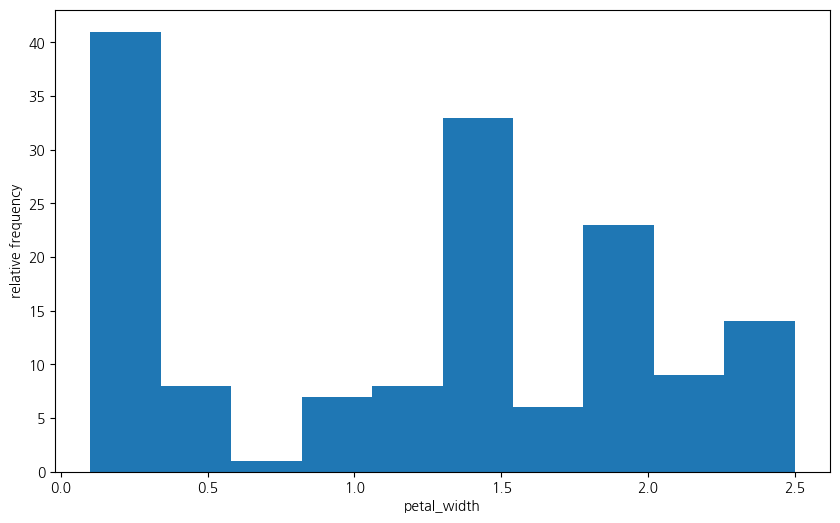

In [13]:
# 특성별 히스토그램
for col in irisDF.columns[:-1]:
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.hist(irisDF[col], density=False)
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('relative frequency')
    plt.show()

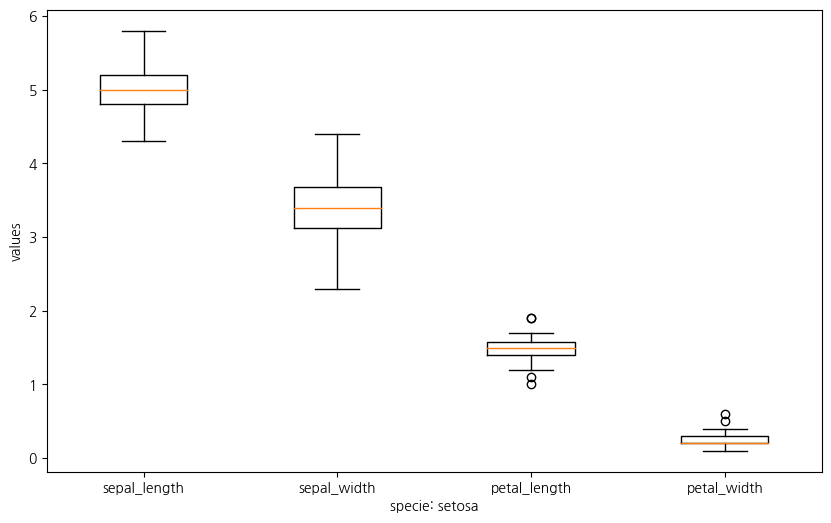

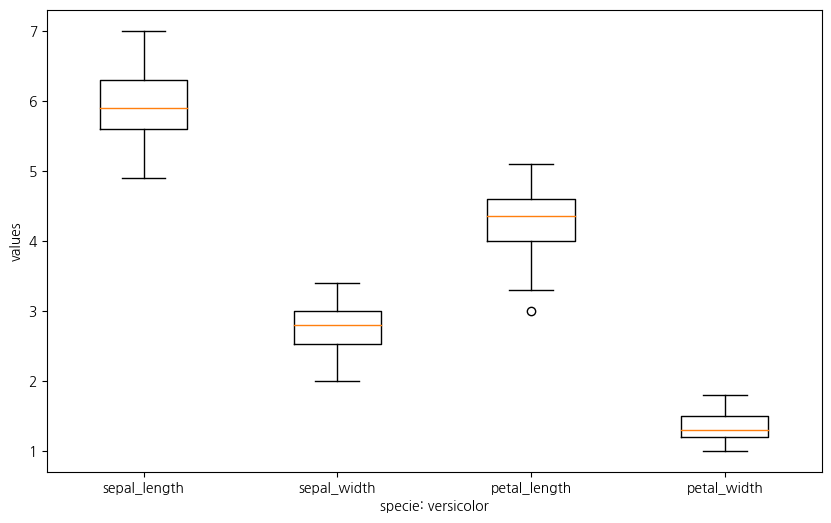

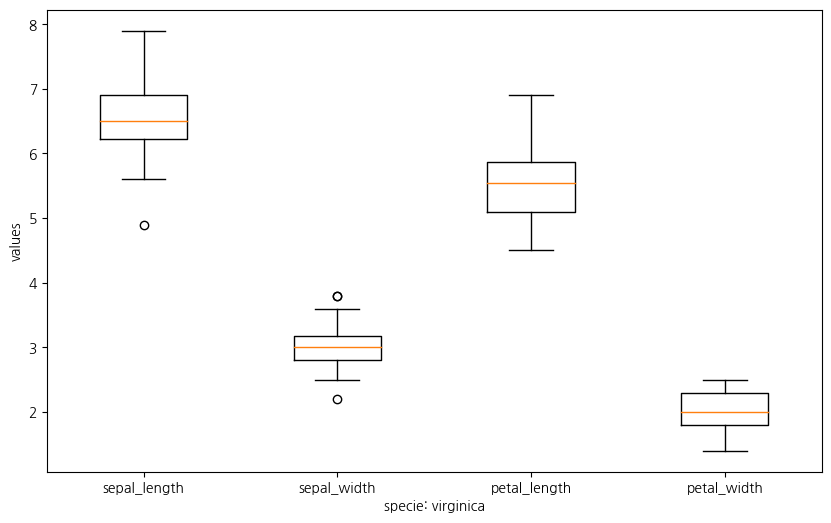

In [14]:
# 품종별 상자 그림 그리기
for specie in irisDF['species'].unique():
    specieDF = irisDF[irisDF['species'] == specie]
    fig = plt.figure(figsize=(10,6))
    
    plt.boxplot(specieDF[list(specieDF.columns[:-1])])
    plt.xlabel(f'specie: {specie}')
    plt.ylabel('values')
    plt.xticks(ticks=range(1, len(specieDF.columns[:-1])+1), labels=specieDF.columns[:-1])
    plt.show()

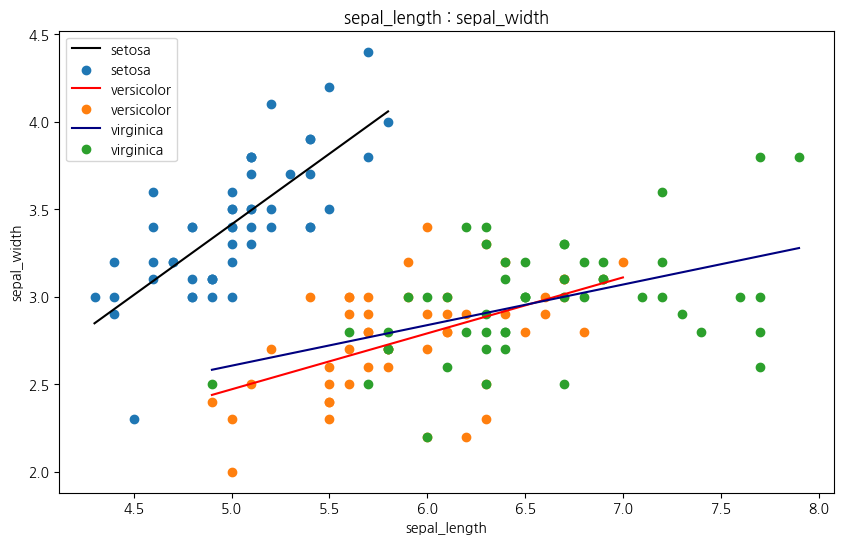

In [16]:
# 품종별로 꽃받침 길이와 꽃받침 너비의 관계
colorList = ['black', 'red', 'navy']
color_idx = 0

fig = plt.figure(figsize=(10,6))
for specie in irisDF['species'].unique():    
    specieDF = irisDF[irisDF['species'] == specie]    
    poly_fit = np.polyfit(specieDF['sepal_length'], specieDF['sepal_width'], 1)
    poly_1d = np.poly1d(poly_fit)
    xs = np.linspace(specieDF['sepal_length'].min(), specieDF['sepal_length'].max())
    ys = poly_1d(xs)
    
    plt.plot(xs, ys, color=colorList[color_idx], label=f'{specie}')
    plt.scatter(specieDF['sepal_length'], specieDF['sepal_width'], label=f'{specie}')
    plt.title('sepal_length : sepal_width')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    color_idx += 1
plt.legend()
plt.show()